# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from joblib import load
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model

2023-06-27 17:54:37.733636: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-27 17:54:38.599094: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-27 17:54:38.605268: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-27 17:54:43.666972: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
X_test = np.load('../data/X_test.npy')
X_test_all_indices = np.load('../data/X_test_all_indices.npy')
X_test_selected_indices = np.load('../data/X_test_selected_indices.npy')
y_test = np.load('../data/y_test.npy')

scaler_test = StandardScaler()
X_test_scaled = scaler_test.fit_transform(X_test)
scaler_test_all_indices = StandardScaler()
X_test_all_indices_scaled = scaler_test_all_indices.fit_transform(X_test_all_indices)
scaler_test_selected_indices = StandardScaler()
X_test_selected_indices_scaled = scaler_test_selected_indices.fit_transform(X_test_selected_indices)

scaler_targets = StandardScaler()
y_test_scaled = scaler_targets.fit_transform(y_test.reshape(-1, 1))

In [23]:
linear_regression_10_bands = load('../models/linear_regression_10_bands.joblib')
linear_regression_all_bands = load('../models/linear_regression_all_bands.joblib')
linear_regression_selected_bands = load('../models/linear_regression_selected_bands.joblib')
knn_10_bands = load('../models/knn_10_bands.joblib')
knn_all_bands = load('../models/knn_all_bands.joblib')
knn_selected_bands = load('../models/knn_selected_bands.joblib')
decision_tree_10_bands = load('../models/decision_tree_10_bands.joblib')
decision_tree_all_bands = load('../models/decision_tree_all_bands.joblib')
decision_tree_selected_bands = load('../models/decision_tree_selected_bands.joblib')
random_forest = load('../models/random_forest.joblib')
extra_trees = load('../models/extra_trees.joblib')
adaboost = load('../models/adaboost.joblib')
xgboost = load('../models/xgboost.joblib')
mlp = load_model('../models/mlp.h5')
cnn = load_model('../models/cnn')

Create 7x7 Patches for CNN evaluation.

In [5]:
indices_test = np.load('../data/indices_test.npy')
X_full = np.stack(list(map(lambda index: np.load(f'../data/images_train/image_{index:03d}.npy'), range(40))))

KERNEL_RADIUS = 3
KERNEL_SIZE = KERNEL_RADIUS*2 + 1

expanded_indices_test = np.repeat(indices_test, (KERNEL_SIZE*KERNEL_SIZE), axis=0)

offsets = np.array([(i, j) for i in range(-KERNEL_RADIUS, KERNEL_RADIUS+1) for j in range(-KERNEL_RADIUS, KERNEL_RADIUS+1)])

# Compute new width and height indices with offsets and ensure they're within valid bounds
expanded_indices_test[:, 2] = np.clip(
    np.repeat(indices_test[:, 2], (KERNEL_SIZE*KERNEL_SIZE)) + np.tile(offsets[:, 0], len(indices_test)), 0, 1023
)
expanded_indices_test[:, 3] = np.clip(
    np.repeat(indices_test[:, 3], (KERNEL_SIZE*KERNEL_SIZE)) + np.tile(offsets[:, 1], len(indices_test)), 0, 1023
)

X_test_7x7 = X_full[expanded_indices_test[:, 0], :, expanded_indices_test[:, 2], expanded_indices_test[:, 3]]
X_test_7x7 = np.reshape(X_test_7x7, ((X_test_7x7.shape[0] // (KERNEL_SIZE*KERNEL_SIZE)), KERNEL_SIZE, KERNEL_SIZE, -1))

# Calculate the mean and standard deviation of the data
mean = np.mean(X_test_7x7)
std = np.std(X_test_7x7)
# Normalize the data
X_test_7x7 = (X_test_7x7 - mean) / std

# Compute Statistics on the Predictions

In [74]:
y_pred_linear_regression_10_bands = linear_regression_10_bands.predict(X_test)
y_pred_linear_regreesion_all_bands = linear_regression_all_bands.predict(X_test_all_indices)
y_pred_linear_regression_selected_bands = linear_regression_selected_bands.predict(X_test_selected_indices)
y_pred_knn_10_bands = knn_10_bands.predict(X_test_scaled)
y_pred_knn_all_bands = knn_all_bands.predict(X_test_all_indices_scaled)
y_pred_knn_selected_bands = knn_selected_bands.predict(X_test_selected_indices_scaled)
y_pred_decision_tree_10_bands = decision_tree_10_bands.predict(X_test)
y_pred_decision_tree_all_bands = decision_tree_all_bands.predict(X_test_all_indices)
y_pred_decision_tree_selected_bands = decision_tree_selected_bands.predict(X_test_selected_indices)
y_pred_random_forest = random_forest.predict(X_test_all_indices)
y_pred_extra_trees = extra_trees.predict(X_test_all_indices)
y_pred_adaboost = adaboost.predict(X_test_all_indices)
y_pred_xgboost = xgboost.predict(X_test_all_indices)
y_pred_mlp = scaler_targets.inverse_transform(mlp.predict(X_test_all_indices_scaled))[:, 0]
y_pred_cnn = cnn.predict(X_test_7x7)[:, 0]

122/122 [==============================] - 0s 2ms/step


In [25]:
predictions = {
    'Label': y_test,
    'Linear Regression (10 bands)': y_pred_linear_regression_10_bands,
    'Linear Regression (all bands)': y_pred_linear_regreesion_all_bands,
    'Linear Regression (selected bands)': y_pred_linear_regression_selected_bands,
    'KNN (10 bands)': y_pred_knn_10_bands,
    'KNN (all bands)': y_pred_knn_all_bands,
    'KNN (selected bands)': y_pred_knn_selected_bands,
    'Decision Tree (10 bands)': y_pred_decision_tree_10_bands,
    'Decision Tree (all bands)': y_pred_decision_tree_all_bands,
    'Decision Tree (selected bands)': y_pred_decision_tree_selected_bands,
    'Random Forest': y_pred_random_forest,
    'Extra Trees': y_pred_extra_trees,
    'AdaBoost': y_pred_adaboost,
    'XGBoost': y_pred_xgboost,
    'MLP': y_pred_mlp,
    'CNN': y_pred_cnn
}

# Convert to DataFrame
df_predictions = pd.DataFrame(predictions)

# Get descriptive statistics
df_predictions.describe()

,Label,Linear Regression (10 bands),Linear Regression (all bands),Linear Regression (selected bands),KNN (10 bands),KNN (all bands),KNN (selected bands),Decision Tree (10 bands),Decision Tree (all bands),Decision Tree (selected bands),Random Forest,Extra Trees,AdaBoost,XGBoost,MLP,CNN
count,3887.000000,3887.000000,3887.000000,3887.000000,3887.000000,3887.000000,3887.000000,3887.000000,3887.000000,3887.000000,3887.000000,3887.000000,3887.000000,3887.000000,3887.000000,3887.000000
mean,11.890702,12.017736,11.940293,12.034005,11.929587,11.856958,11.871426,11.926687,11.904251,11.950075,11.986535,11.985617,11.895246,10.996716,11.058320,12.384148
std,10.980493,7.076760,7.981692,7.450380,8.644216,8.574779,8.575477,8.444318,8.493909,8.473339,8.391287,8.397672,7.970793,9.375118,9.504242,10.163420
min,2.240000,-35.435592,-3.574576,-27.682202,2.405151,2.418720,2.410934,2.477975,2.440444,2.444000,2.418953,2.410842,4.024374,1.967073,2.232112,0.000000
25%,2.850000,6.690026,5.072842,6.225745,4.199607,4.191805,4.277535,4.145105,4.160949,4.277101,4.414889,4.399783,4.166264,3.022045,2.902411,3.180704
50%,5.820000,11.791601,9.221716,10.964180,7.655749,7.520085,7.576399,7.555329,6.976207,7.605893,8.144412,8.105342,8.673029,5.161296,5.164006,6.892105
75%,20.200001,18.273766,19.107416,18.467993,20.426891,20.175946,20.245969,21.013082,20.150028,19.898850,20.038869,20.179442,21.458220,20.723217,20.909608,22.581894
max,81.690002,26.152177,35.568918,29.357613,31.603111,30.688893,32.321597,36.097000,35.278000,33.633611,33.054828,32.862181,26.158952,30.829103,34.411240,37.061703


# Visualization of True Labels vs. Predictions

TODO: Visualize CDF Predictions vs. Labels

## Linear Regression

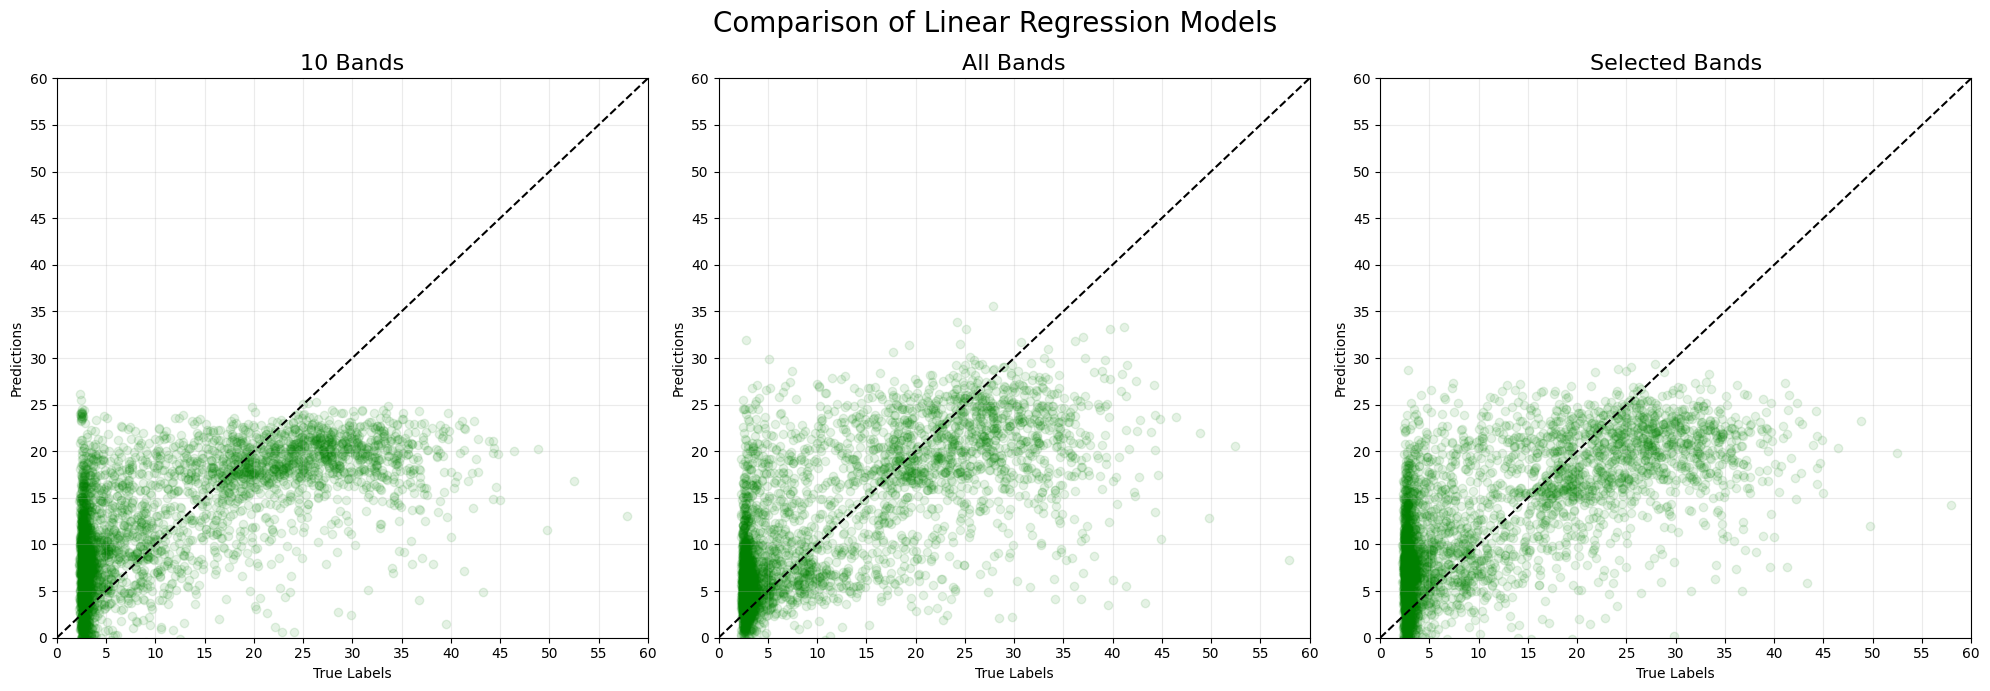

In [64]:
fig = plt.figure(figsize=(20, 7))

plt.subplot(1, 3, 1)  # Arguments are: nrows, ncols, index
plt.scatter(y_test, y_pred_linear_regression_10_bands, color="green", alpha=0.1)
plt.plot([0, 60], [0, 60], color='black', linestyle='--')
plt.xlim([0, 60])
plt.ylim([0, 60])
plt.xticks(np.arange(0, 61, 5))
plt.yticks(np.arange(0, 61, 5))
plt.grid(alpha=0.25)
plt.xlabel("True Labels")
plt.ylabel("Predictions")
plt.title("10 Bands", fontsize=16)

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_linear_regreesion_all_bands, color="green", alpha=0.1)
plt.plot([0, 60], [0, 60], color='black', linestyle='--')
plt.xlim([0, 60])
plt.ylim([0, 60])
plt.xticks(np.arange(0, 61, 5))
plt.yticks(np.arange(0, 61, 5))
plt.grid(alpha=0.25)
plt.xlabel("True Labels")
plt.ylabel("Predictions")
plt.title("All Bands", fontsize=16)

plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_linear_regression_selected_bands, color="green", alpha=0.1)
plt.plot([0, 60], [0, 60], color='black', linestyle='--')
plt.xlim([0, 60])
plt.ylim([0, 60])
plt.xticks(np.arange(0, 61, 5))
plt.yticks(np.arange(0, 61, 5))
plt.grid(alpha=0.25)
plt.xlabel("True Labels")
plt.ylabel("Predictions")
plt.title("Selected Bands", fontsize=16)

plt.suptitle("Comparison of Linear Regression Models", fontsize=20)
plt.tight_layout()
plt.show()

## KNN

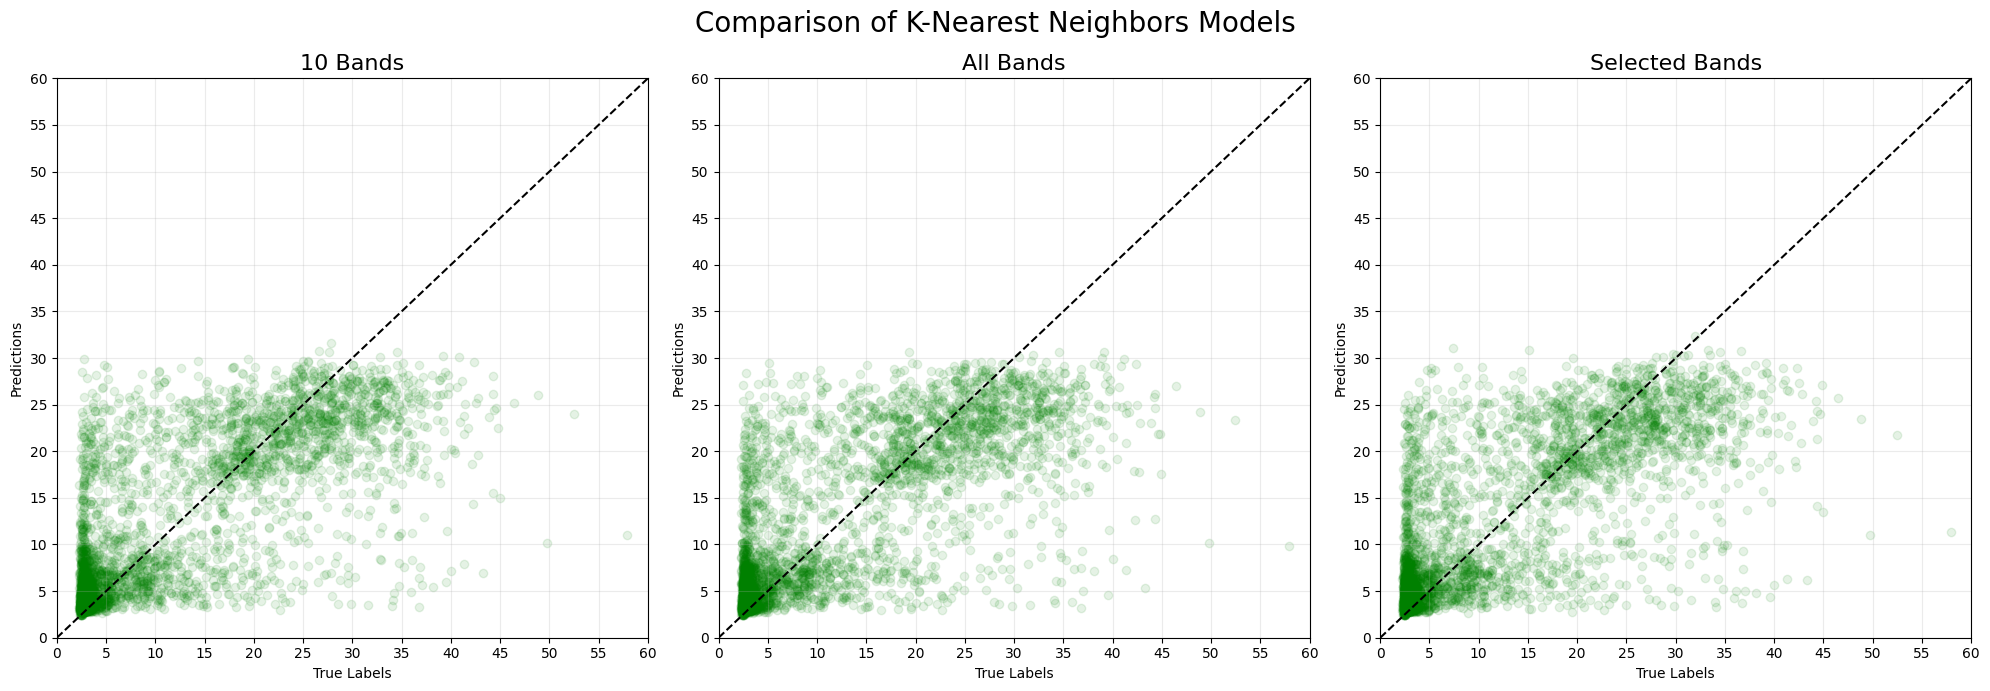

In [63]:
fig = plt.figure(figsize=(20, 7))

plt.subplot(1, 3, 1)  # Arguments are: nrows, ncols, index
plt.scatter(y_test, y_pred_knn_10_bands, color="green", alpha=0.1)
plt.plot([0, 60], [0, 60], color='black', linestyle='--')
plt.xlim([0, 60])
plt.ylim([0, 60])
plt.xticks(np.arange(0, 61, 5))
plt.yticks(np.arange(0, 61, 5))
plt.grid(alpha=0.25)
plt.xlabel("True Labels")
plt.ylabel("Predictions")
plt.title("10 Bands", fontsize=16)

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_knn_all_bands, color="green", alpha=0.1)
plt.plot([0, 60], [0, 60], color='black', linestyle='--')
plt.xlim([0, 60])
plt.ylim([0, 60])
plt.xticks(np.arange(0, 61, 5))
plt.yticks(np.arange(0, 61, 5))
plt.grid(alpha=0.25)
plt.xlabel("True Labels")
plt.ylabel("Predictions")
plt.title("All Bands", fontsize=16)

plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_knn_selected_bands, color="green", alpha=0.1)
plt.plot([0, 60], [0, 60], color='black', linestyle='--')
plt.xlim([0, 60])
plt.ylim([0, 60])
plt.xticks(np.arange(0, 61, 5))
plt.yticks(np.arange(0, 61, 5))
plt.grid(alpha=0.25)
plt.xlabel("True Labels")
plt.ylabel("Predictions")
plt.title("Selected Bands", fontsize=16)


plt.suptitle("Comparison of K-Nearest Neighbors Models", fontsize=20)
plt.tight_layout()
plt.show()

# DT

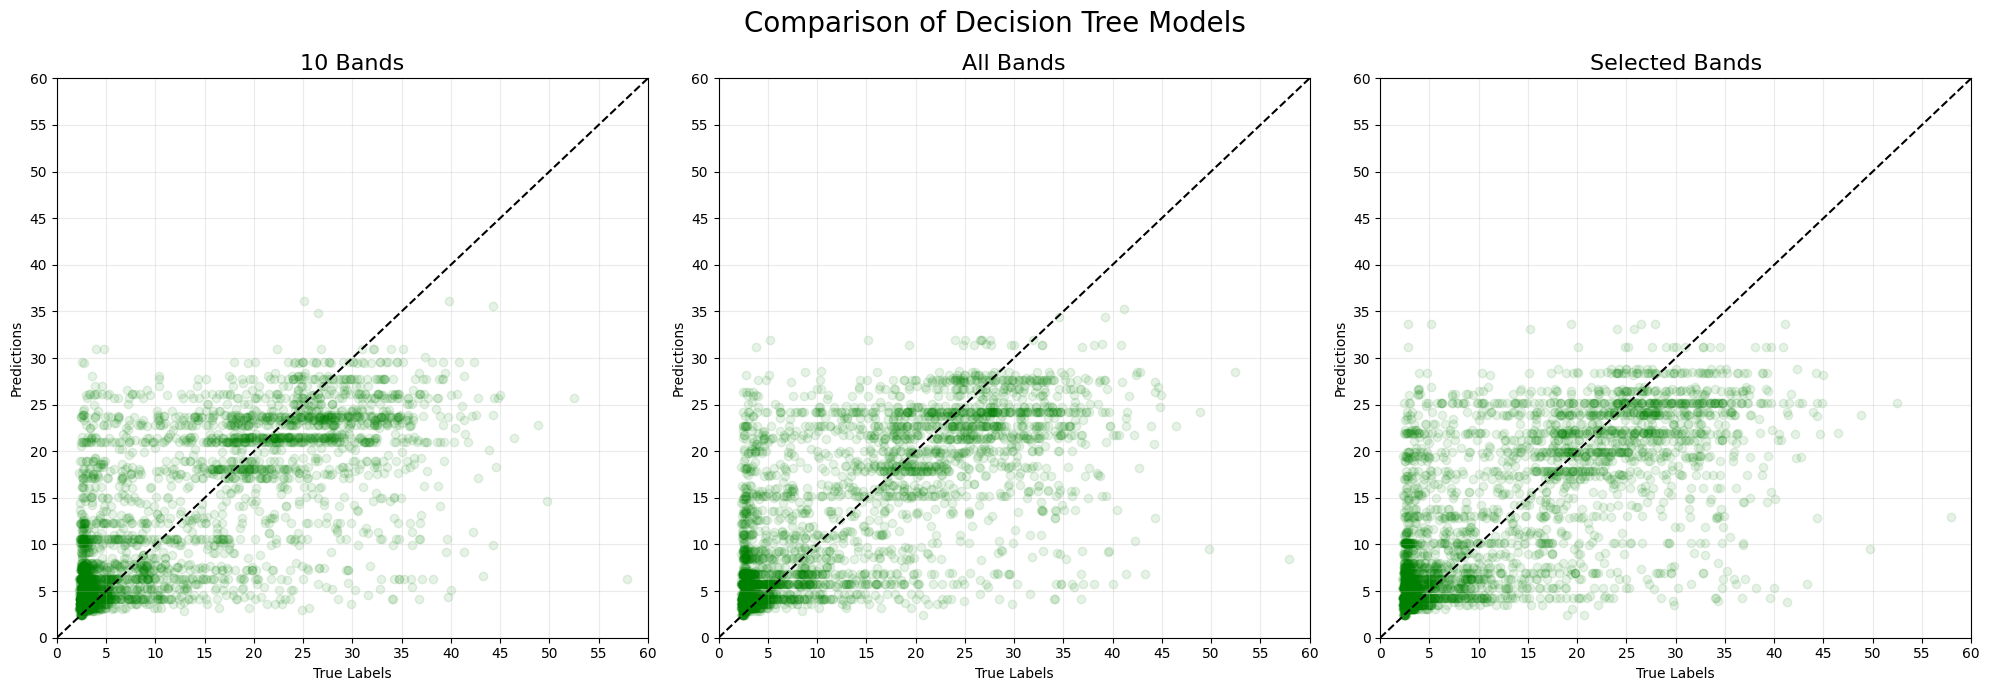

In [65]:
fig = plt.figure(figsize=(20, 7))

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_decision_tree_10_bands, color="green", alpha=0.1)
plt.plot([0, 60], [0, 60], color='black', linestyle='--')
plt.xlim([0, 60])
plt.ylim([0, 60])
plt.xticks(np.arange(0, 61, 5))
plt.yticks(np.arange(0, 61, 5))
plt.grid(alpha=0.25)
plt.xlabel("True Labels")
plt.ylabel("Predictions")
plt.title("10 Bands", fontsize=16)

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_decision_tree_all_bands, color="green", alpha=0.1)
plt.plot([0, 60], [0, 60], color='black', linestyle='--')
plt.xlim([0, 60])
plt.ylim([0, 60])
plt.xticks(np.arange(0, 61, 5))
plt.yticks(np.arange(0, 61, 5))
plt.grid(alpha=0.25)
plt.xlabel("True Labels")
plt.ylabel("Predictions")
plt.title("All Bands", fontsize=16)

plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_decision_tree_selected_bands, color="green", alpha=0.1)
plt.plot([0, 60], [0, 60], color='black', linestyle='--')
plt.xlim([0, 60])
plt.ylim([0, 60])
plt.xticks(np.arange(0, 61, 5))
plt.yticks(np.arange(0, 61, 5))
plt.grid(alpha=0.25)
plt.xlabel("True Labels")
plt.ylabel("Predictions")
plt.title("Selected Bands", fontsize=16)

plt.suptitle("Comparison of Decision Tree Models", fontsize=20)
plt.tight_layout()
plt.show()

## Tree Ensembles

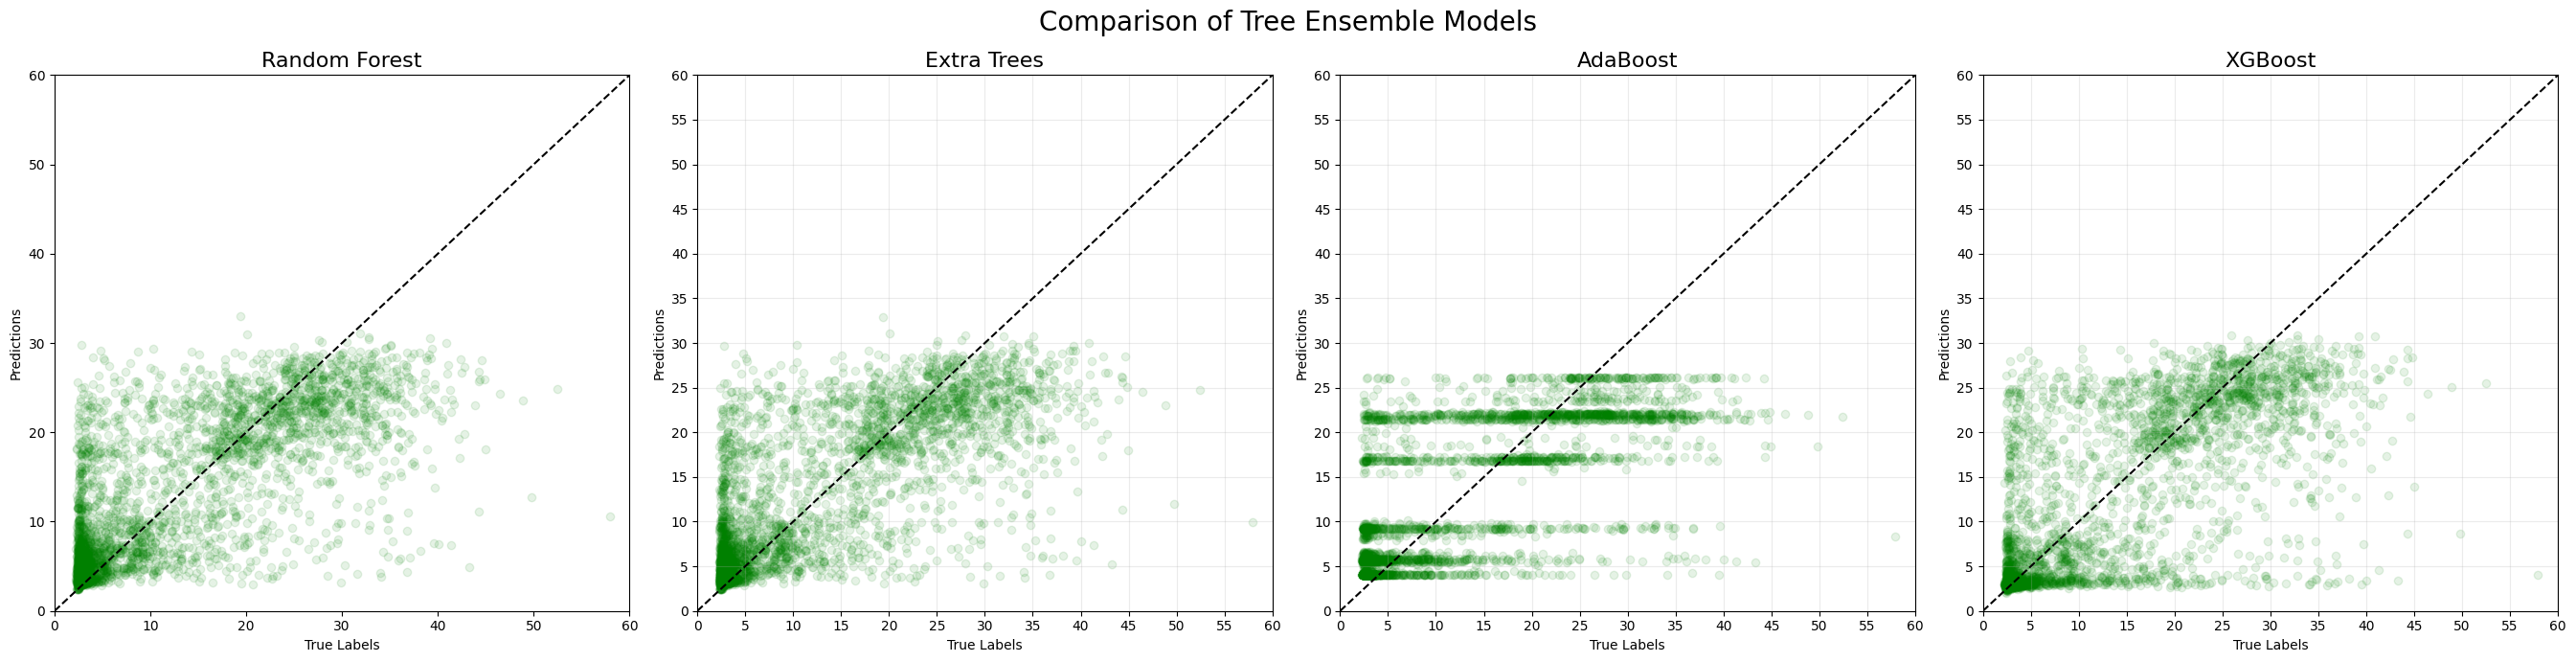

In [60]:
fig = plt.figure(figsize=(27, 7))

plt.subplot(1, 4, 1)
plt.scatter(y_test, y_pred_random_forest, color="green", alpha=0.1)
plt.plot([0, 60], [0, 60], color='black', linestyle='--')
plt.ylim([0, 60])
plt.xlim([0, 60])
plt.xlabel("True Labels")
plt.ylabel("Predictions")
plt.title("Random Forest", fontsize=16)

plt.subplot(1, 4, 2)
plt.scatter(y_test, y_pred_extra_trees, color="green", alpha=0.1)
plt.plot([0, 60], [0, 60], color='black', linestyle='--')
plt.xlim([0, 60])
plt.ylim([0, 60])
plt.xticks(np.arange(0, 61, 5))
plt.yticks(np.arange(0, 61, 5))
plt.grid(alpha=0.25)
plt.xlabel("True Labels")
plt.ylabel("Predictions")
plt.title("Extra Trees", fontsize=16)

plt.subplot(1, 4, 3)
plt.scatter(y_test, y_pred_adaboost, color="green", alpha=0.1)
plt.plot([0, 60], [0, 60], color='black', linestyle='--')
plt.xlim([0, 60])
plt.ylim([0, 60])
plt.xticks(np.arange(0, 61, 5))
plt.yticks(np.arange(0, 61, 5))
plt.grid(alpha=0.25)
plt.xlabel("True Labels")
plt.ylabel("Predictions")
plt.title("AdaBoost", fontsize=16)

plt.subplot(1, 4, 4)
plt.scatter(y_test, y_pred_xgboost, color="green", alpha=0.1)
plt.plot([0, 60], [0, 60], color='black', linestyle='--')
plt.xlim([0, 60])
plt.ylim([0, 60])
plt.xticks(np.arange(0, 61, 5))
plt.yticks(np.arange(0, 61, 5))
plt.grid(alpha=0.25)
plt.xlabel("True Labels")
plt.ylabel("Predictions")
plt.title("XGBoost", fontsize=16)

plt.suptitle("Comparison of Tree Ensemble Models", fontsize=20)
plt.tight_layout()
plt.show()

## MLP

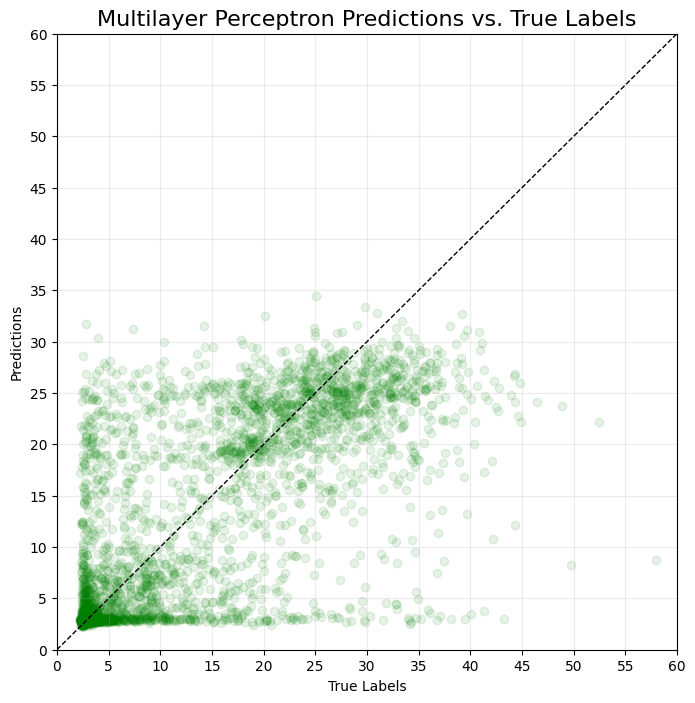

In [57]:
fig = plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred_mlp, color="green", alpha=0.1)
plt.plot([0, 60], [0, 60], color='black', linestyle='--', linewidth=1)
plt.xlim([0, 60])
plt.ylim([0, 60])
plt.xticks(np.arange(0, 61, 5))
plt.yticks(np.arange(0, 61, 5))
plt.grid(alpha=0.25)
plt.xlabel("True Labels")
plt.ylabel("Predictions")
plt.title("Multilayer Perceptron Predictions vs. True Labels", fontsize=16)

plt.show()

## CNN

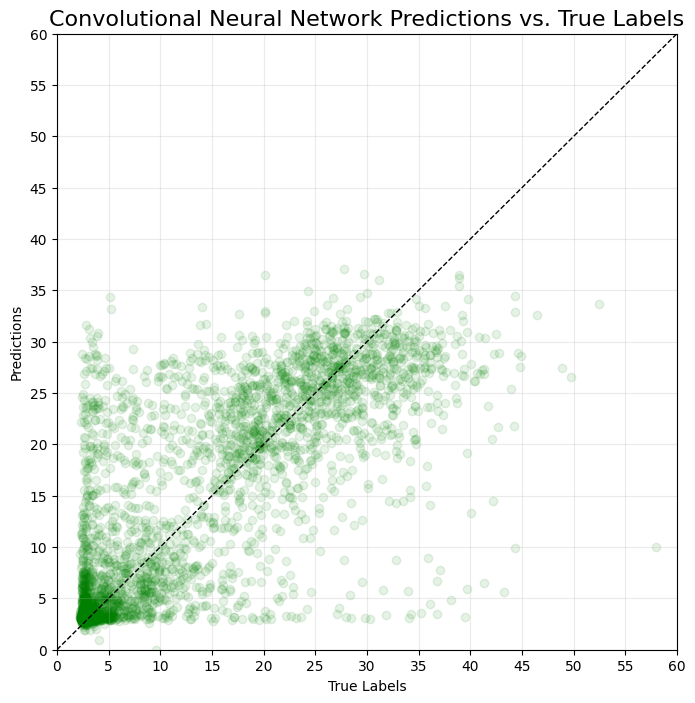

In [56]:
fig = plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred_cnn, color="green", alpha=0.1)
plt.plot([0, 60], [0, 60], color='black', linestyle='--', linewidth=1)
plt.xlim([0, 60])
plt.ylim([0, 60])
plt.xticks(np.arange(0, 61, 5))
plt.yticks(np.arange(0, 61, 5))
plt.grid(alpha=0.25)
plt.xlabel("True Labels")
plt.ylabel("Predictions")
plt.title("Convolutional Neural Network Predictions vs. True Labels", fontsize=16)

plt.show()

## Compute CDF and Histogram of Labels vs. Predictions

Similar to `ComputeStatistics` notebook.

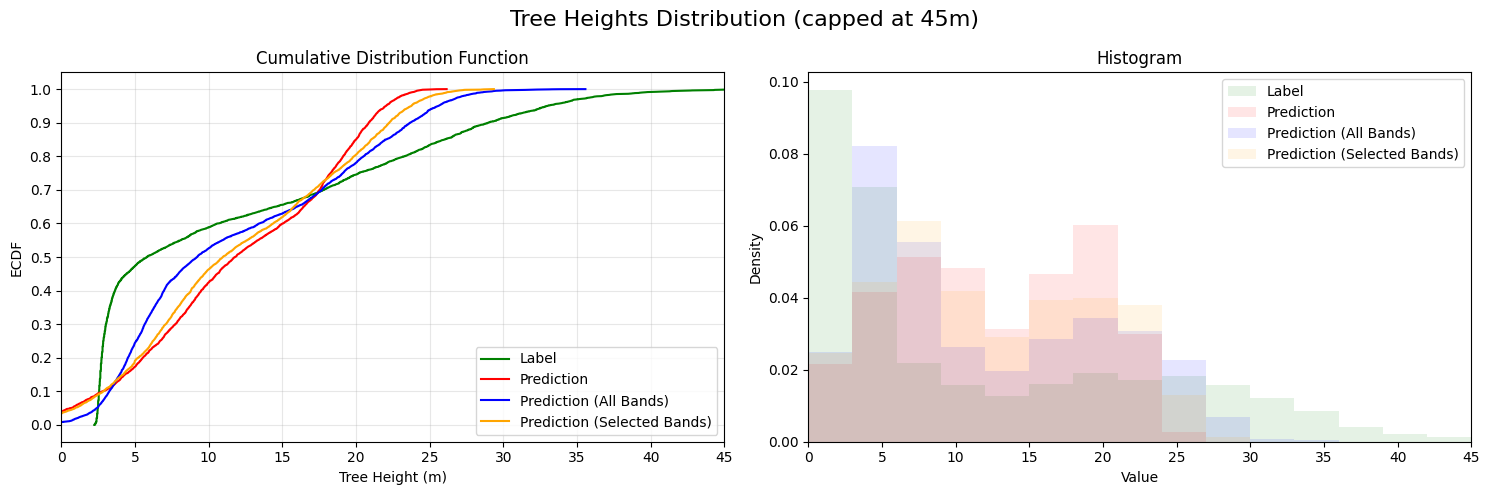

In [77]:
y_test_sorted = np.sort(y_test)
y_test_cumulative = np.linspace(0., 1., len(y_test_sorted))
y_cumulative = np.linspace(0., 1., len(y_test_sorted))

y_pred_linear_regression_10_bands_sorted = np.sort(y_pred_linear_regression_10_bands)
y_pred_linear_regression_10_bands_cumulative = np.linspace(0., 1., len(y_pred_linear_regression_10_bands_sorted))

y_pred_linear_regression_all_bands_sorted = np.sort(y_pred_linear_regreesion_all_bands)
y_pred_linear_regression_all_bands_cumulative = np.linspace(0., 1., len(y_pred_linear_regression_all_bands_sorted))

y_pred_linear_regression_selected_bands_sorted = np.sort(y_pred_linear_regression_selected_bands)
y_pred_linear_regression_selected_bands_cumulative = np.linspace(0., 1., len(y_pred_linear_regression_selected_bands_sorted))

fig = plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)  # Arguments are: nrows, ncols, index
plt.plot(y_test_sorted, y_cumulative, label='Label', color='g')
plt.plot(y_pred_linear_regression_10_bands_sorted, y_pred_linear_regression_10_bands_cumulative, label='Prediction', color='r')
plt.plot(y_pred_linear_regression_all_bands_sorted, y_pred_linear_regression_all_bands_cumulative, label='Prediction (All Bands)', color='b')
plt.plot(y_pred_linear_regression_selected_bands_sorted, y_pred_linear_regression_selected_bands_cumulative, label='Prediction (Selected Bands)', color='orange')
plt.title('Cumulative Distribution Function')
plt.xlabel('Tree Height (m)')
plt.ylabel('ECDF')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(np.arange(0, 46, 5))
plt.xlim(0, 45)
plt.grid(alpha=0.3)
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.hist(y_test, bins=range(0, 46, 3), density=True, color='g', alpha=0.1, label='Label')
plt.hist(y_pred_linear_regression_10_bands, bins=range(0, 46, 3), density=True, color='r', alpha=0.1, label='Prediction')
plt.hist(y_pred_linear_regreesion_all_bands, bins=range(0, 46, 3), density=True, color='b', alpha=0.1, label='Prediction (All Bands)')
plt.hist(y_pred_linear_regression_selected_bands, bins=range(0, 46, 3), density=True, color='orange', alpha=0.1, label='Prediction (Selected Bands)')
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Density')
plt.xlim(0, 45)
plt.legend(loc='upper right')

# Super title for the entire figure
fig.suptitle('Tree Heights Distribution (capped at 45m)', fontsize=16)

plt.tight_layout()
# Display the figure with the subplots
plt.show()

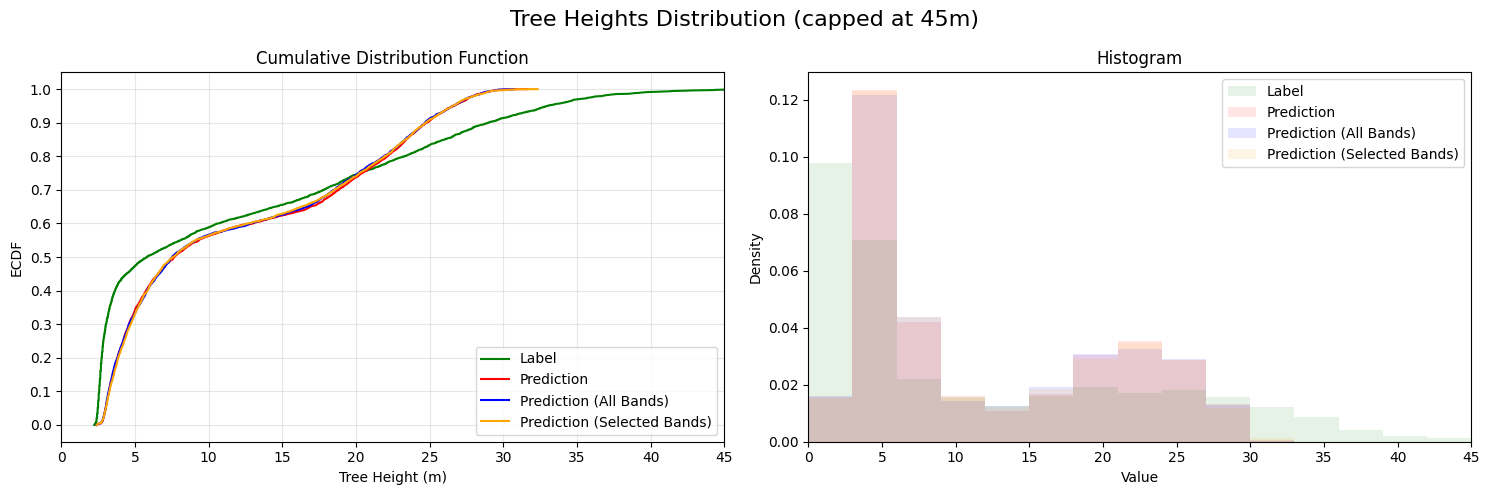

In [78]:
y_test_sorted = np.sort(y_test)
y_test_cumulative = np.linspace(0., 1., len(y_test_sorted))
y_cumulative = np.linspace(0., 1., len(y_test_sorted))

y_pred_knn_10_bands_sorted = np.sort(y_pred_knn_10_bands)
y_pred_knn_10_bands_cumulative = np.linspace(0., 1., len(y_pred_knn_10_bands_sorted))

y_pred_knn_all_bands_sorted = np.sort(y_pred_knn_all_bands)
y_pred_knn_all_bands_cumulative = np.linspace(0., 1., len(y_pred_knn_all_bands_sorted))

y_pred_knn_selected_bands_sorted = np.sort(y_pred_knn_selected_bands)
y_pred_knn_selected_bands_cumulative = np.linspace(0., 1., len(y_pred_knn_selected_bands_sorted))

fig = plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)  # Arguments are: nrows, ncols, index
plt.plot(y_test_sorted, y_cumulative, label='Label', color='g')
plt.plot(y_pred_knn_10_bands_sorted, y_pred_knn_10_bands_cumulative, label='Prediction', color='r')
plt.plot(y_pred_knn_all_bands_sorted, y_pred_knn_all_bands_cumulative, label='Prediction (All Bands)', color='b')
plt.plot(y_pred_knn_selected_bands_sorted, y_pred_knn_selected_bands_cumulative, label='Prediction (Selected Bands)', color='orange')
plt.title('Cumulative Distribution Function')
plt.xlabel('Tree Height (m)')
plt.ylabel('ECDF')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(np.arange(0, 46, 5))
plt.xlim(0, 45)
plt.grid(alpha=0.3)
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.hist(y_test, bins=range(0, 46, 3), density=True, color='g', alpha=0.1, label='Label')
plt.hist(y_pred_knn_10_bands, bins=range(0, 46, 3), density=True, color='r', alpha=0.1, label='Prediction')
plt.hist(y_pred_knn_all_bands, bins=range(0, 46, 3), density=True, color='b', alpha=0.1, label='Prediction (All Bands)')
plt.hist(y_pred_knn_selected_bands, bins=range(0, 46, 3), density=True, color='orange', alpha=0.1, label='Prediction (Selected Bands)')
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Density')
plt.xlim(0, 45)
plt.legend(loc='upper right')

# Super title for the entire figure
fig.suptitle('Tree Heights Distribution (capped at 45m)', fontsize=16)

plt.tight_layout()
# Display the figure with the subplots
plt.show()

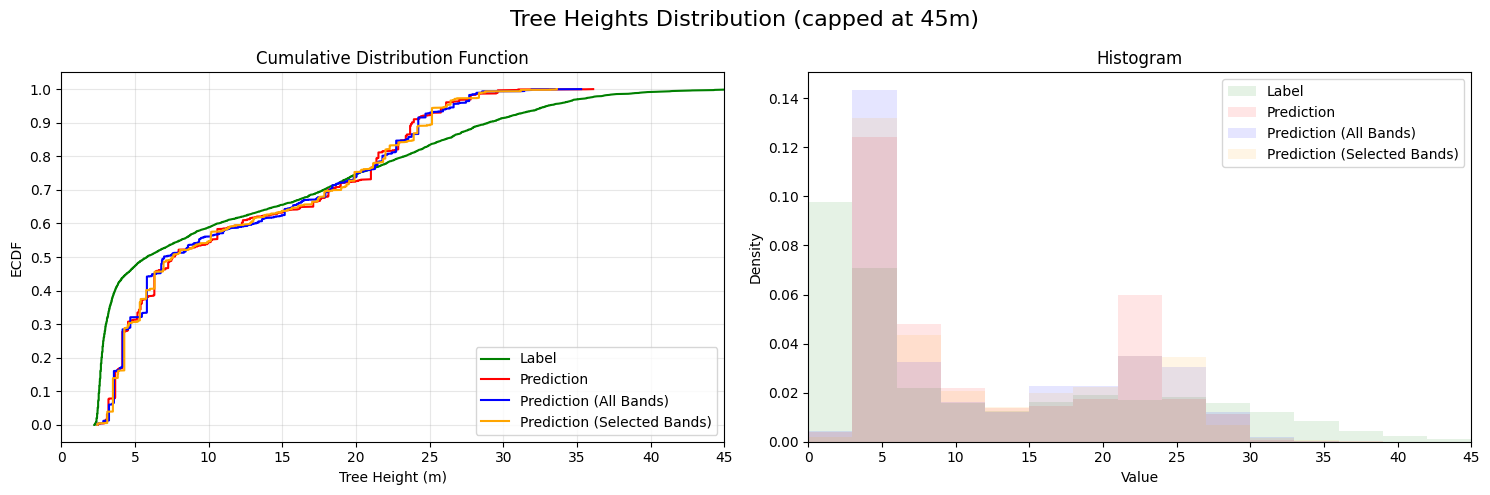

In [80]:
y_test_sorted = np.sort(y_test)
y_test_cumulative = np.linspace(0., 1., len(y_test_sorted))
y_cumulative = np.linspace(0., 1., len(y_test_sorted))

y_pred_decision_tree_10_bands_sorted = np.sort(y_pred_decision_tree_10_bands)
y_pred_decision_tree_10_bands_cumulative = np.linspace(0., 1., len(y_pred_decision_tree_10_bands_sorted))

y_pred_decision_tree_all_bands_sorted = np.sort(y_pred_decision_tree_all_bands)
y_pred_decision_tree_all_bands_cumulative = np.linspace(0., 1., len(y_pred_decision_tree_all_bands_sorted))

y_pred_decision_tree_selected_bands_sorted = np.sort(y_pred_decision_tree_selected_bands)
y_pred_decision_tree_selected_bands_cumulative = np.linspace(0., 1., len(y_pred_decision_tree_selected_bands_sorted))

fig = plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)  # Arguments are: nrows, ncols, index
plt.plot(y_test_sorted, y_cumulative, label='Label', color='g')
plt.plot(y_pred_decision_tree_10_bands_sorted, y_pred_decision_tree_10_bands_cumulative, label='Prediction', color='r')
plt.plot(y_pred_decision_tree_all_bands_sorted, y_pred_decision_tree_all_bands_cumulative, label='Prediction (All Bands)', color='b')
plt.plot(y_pred_decision_tree_selected_bands_sorted, y_pred_decision_tree_selected_bands_cumulative, label='Prediction (Selected Bands)', color='orange')
plt.title('Cumulative Distribution Function')
plt.xlabel('Tree Height (m)')
plt.ylabel('ECDF')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(np.arange(0, 46, 5))
plt.xlim(0, 45)
plt.grid(alpha=0.3)
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.hist(y_test, bins=range(0, 46, 3), density=True, color='g', alpha=0.1, label='Label')
plt.hist(y_pred_decision_tree_10_bands, bins=range(0, 46, 3), density=True, color='r', alpha=0.1, label='Prediction')
plt.hist(y_pred_decision_tree_all_bands, bins=range(0, 46, 3), density=True, color='b', alpha=0.1, label='Prediction (All Bands)')
plt.hist(y_pred_decision_tree_selected_bands, bins=range(0, 46, 3), density=True, color='orange', alpha=0.1, label='Prediction (Selected Bands)')
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Density')
plt.xlim(0, 45)
plt.legend(loc='upper right')

# Super title for the entire figure
fig.suptitle('Tree Heights Distribution (capped at 45m)', fontsize=16)

plt.tight_layout()
# Display the figure with the subplots
plt.show()

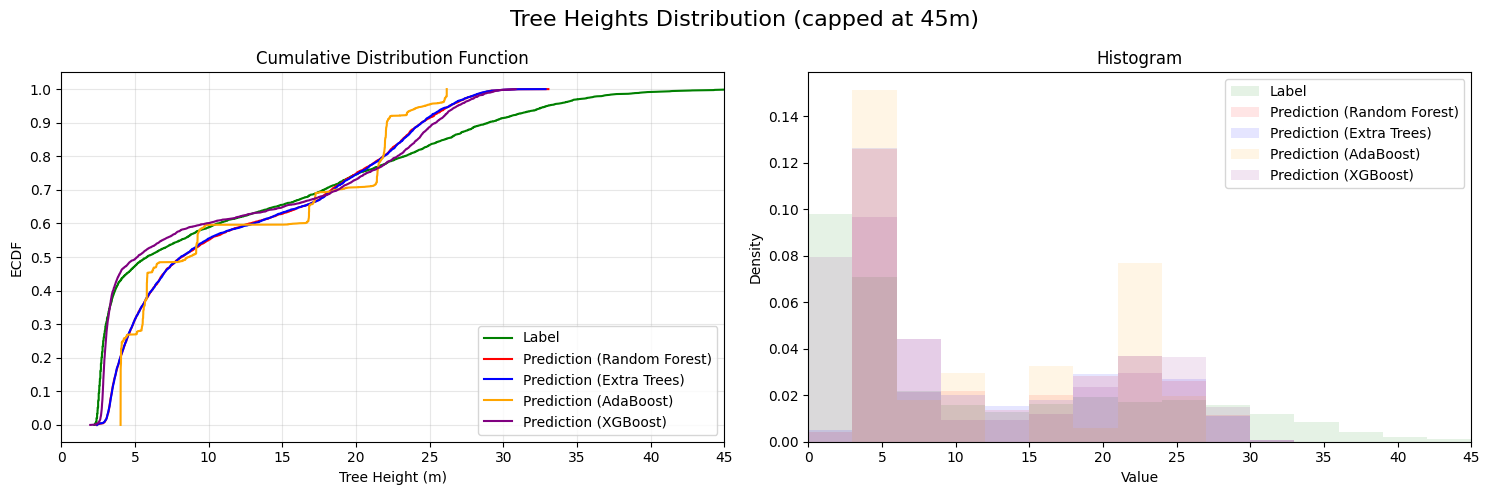

In [81]:
y_test_sorted = np.sort(y_test)
y_test_cumulative = np.linspace(0., 1., len(y_test_sorted))
y_cumulative = np.linspace(0., 1., len(y_test_sorted))

y_pred_random_forest_sorted = np.sort(y_pred_random_forest)
y_pred_random_forest_cumulative = np.linspace(0., 1., len(y_pred_random_forest_sorted))

y_pred_extra_trees_sorted = np.sort(y_pred_extra_trees)
y_pred_extra_trees_cumulative = np.linspace(0., 1., len(y_pred_extra_trees_sorted))

y_pred_adaboost_sorted = np.sort(y_pred_adaboost)
y_pred_adaboost_cumulative = np.linspace(0., 1., len(y_pred_adaboost_sorted))

y_pred_xgboost_sorted = np.sort(y_pred_xgboost)
y_pred_xgboost_cumulative = np.linspace(0., 1., len(y_pred_xgboost_sorted))

fig = plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)  # Arguments are: nrows, ncols, index
plt.plot(y_test_sorted, y_cumulative, label='Label', color='g')
plt.plot(y_pred_random_forest_sorted, y_pred_random_forest_cumulative, label='Prediction (Random Forest)', color='r')
plt.plot(y_pred_extra_trees_sorted, y_pred_extra_trees_cumulative, label='Prediction (Extra Trees)', color='b')
plt.plot(y_pred_adaboost_sorted, y_pred_adaboost_cumulative, label='Prediction (AdaBoost)', color='orange')
plt.plot(y_pred_xgboost_sorted, y_pred_xgboost_cumulative, label='Prediction (XGBoost)', color='purple')
plt.title('Cumulative Distribution Function')
plt.xlabel('Tree Height (m)')
plt.ylabel('ECDF')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(np.arange(0, 46, 5))
plt.xlim(0, 45)
plt.grid(alpha=0.3)
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.hist(y_test, bins=range(0, 46, 3), density=True, color='g', alpha=0.1, label='Label')
plt.hist(y_pred_random_forest, bins=range(0, 46, 3), density=True, color='r', alpha=0.1, label='Prediction (Random Forest)')
plt.hist(y_pred_extra_trees, bins=range(0, 46, 3), density=True, color='b', alpha=0.1, label='Prediction (Extra Trees)')
plt.hist(y_pred_adaboost, bins=range(0, 46, 3), density=True, color='orange', alpha=0.1, label='Prediction (AdaBoost)')
plt.hist(y_pred_xgboost, bins=range(0, 46, 3), density=True, color='purple', alpha=0.1, label='Prediction (XGBoost)')
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Density')
plt.xlim(0, 45)
plt.legend(loc='upper right')

# Super title for the entire figure
fig.suptitle('Tree Heights Distribution (capped at 45m)', fontsize=16)

plt.tight_layout()
# Display the figure with the subplots
plt.show()

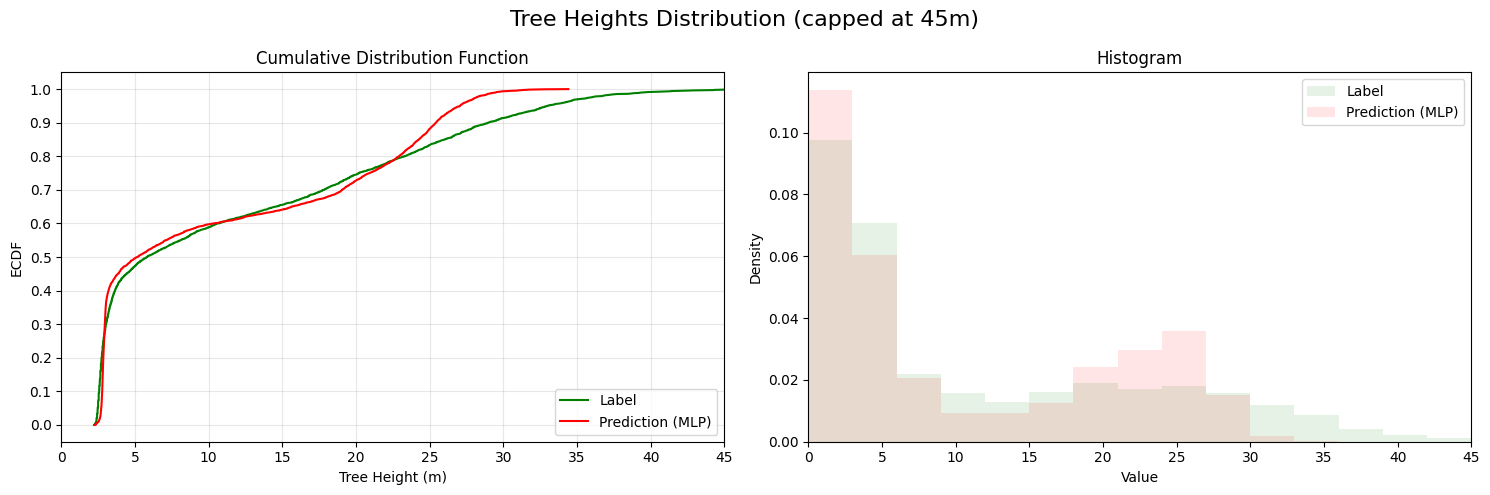

In [82]:
y_test_sorted = np.sort(y_test)
y_test_cumulative = np.linspace(0., 1., len(y_test_sorted))
y_cumulative = np.linspace(0., 1., len(y_test_sorted))

y_pred_mlp_sorted = np.sort(y_pred_mlp)
y_pred_mlp_cumulative = np.linspace(0., 1., len(y_pred_mlp_sorted))

fig = plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)  # Arguments are: nrows, ncols, index
plt.plot(y_test_sorted, y_cumulative, label='Label', color='g')
plt.plot(y_pred_mlp_sorted, y_pred_mlp_cumulative, label='Prediction (MLP)', color='r')
plt.title('Cumulative Distribution Function')
plt.xlabel('Tree Height (m)')
plt.ylabel('ECDF')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(np.arange(0, 46, 5))
plt.xlim(0, 45)
plt.grid(alpha=0.3)
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.hist(y_test, bins=range(0, 46, 3), density=True, color='g', alpha=0.1, label='Label')
plt.hist(y_pred_mlp, bins=range(0, 46, 3), density=True, color='r', alpha=0.1, label='Prediction (MLP)')
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Density')
plt.xlim(0, 45)
plt.legend(loc='upper right')

# Super title for the entire figure
fig.suptitle('Tree Heights Distribution (capped at 45m)', fontsize=16)

plt.tight_layout()
# Display the figure with the subplots
plt.show()

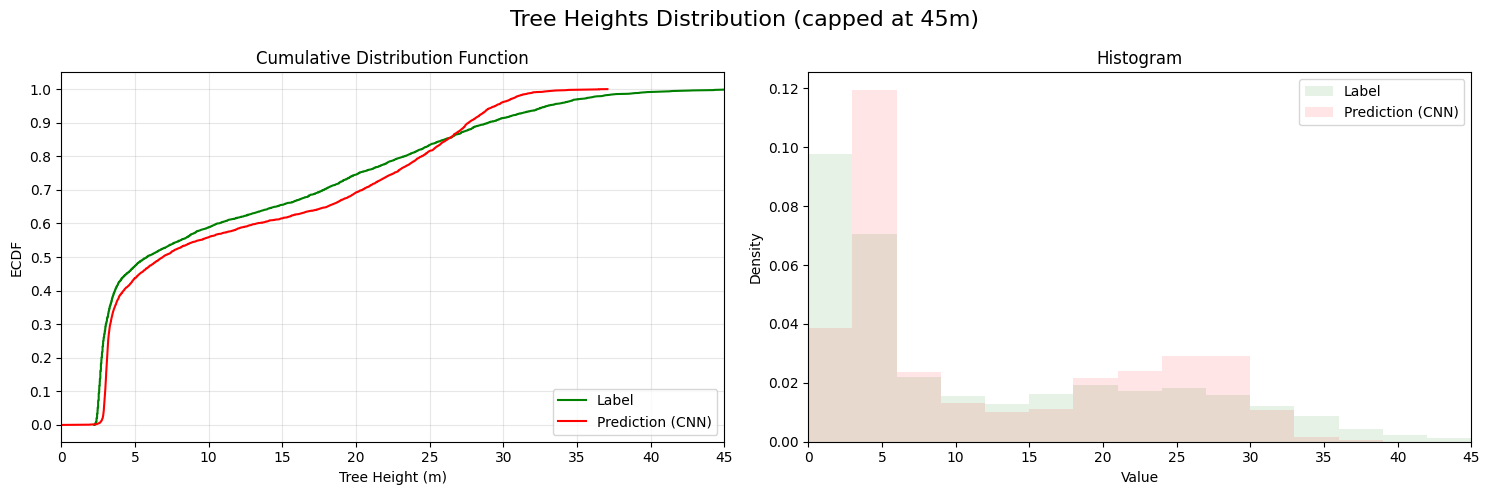

In [83]:
y_test_sorted = np.sort(y_test)
y_test_cumulative = np.linspace(0., 1., len(y_test_sorted))
y_cumulative = np.linspace(0., 1., len(y_test_sorted))

y_pred_cnn_sorted = np.sort(y_pred_cnn)
y_pred_cnn_cumulative = np.linspace(0., 1., len(y_pred_cnn_sorted))

fig = plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)  # Arguments are: nrows, ncols, index
plt.plot(y_test_sorted, y_cumulative, label='Label', color='g')
plt.plot(y_pred_cnn_sorted, y_pred_cnn_cumulative, label='Prediction (CNN)', color='r')
plt.title('Cumulative Distribution Function')
plt.xlabel('Tree Height (m)')
plt.ylabel('ECDF')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(np.arange(0, 46, 5))
plt.xlim(0, 45)
plt.grid(alpha=0.3)
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.hist(y_test, bins=range(0, 46, 3), density=True, color='g', alpha=0.1, label='Label')
plt.hist(y_pred_cnn, bins=range(0, 46, 3), density=True, color='r', alpha=0.1, label='Prediction (CNN)')
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Density')
plt.xlim(0, 45)
plt.legend(loc='upper right')

# Super title for the entire figure
fig.suptitle('Tree Heights Distribution (capped at 45m)', fontsize=16)

plt.tight_layout()
# Display the figure with the subplots
plt.show()